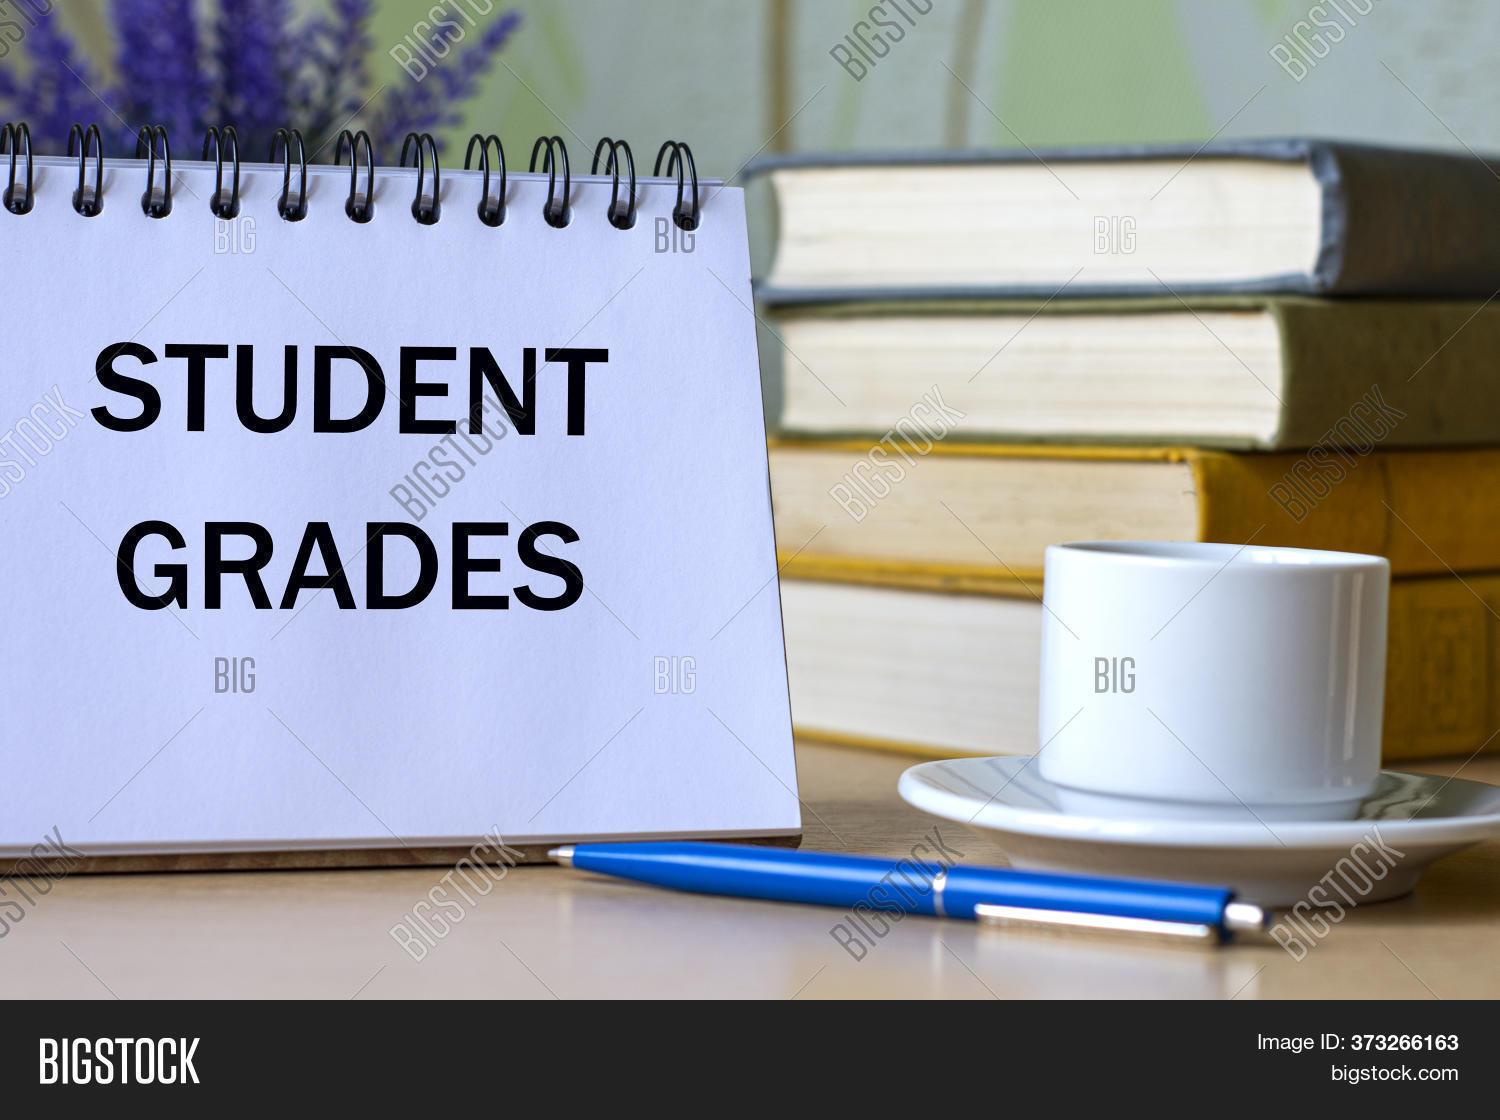

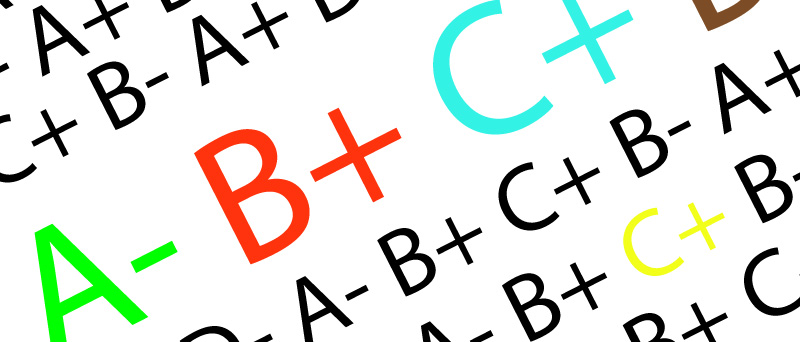

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as plt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
stud = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')

In [4]:
stud

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [5]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [6]:
stud=stud.drop(columns=['Seat No.'], axis=1)
stud.shape

(571, 42)

In [7]:
stud.drop_duplicates()
stud.shape

(571, 42)

In [8]:
stud.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [9]:
row_null=stud.isnull().sum(axis=1)
row_null

0      0
1      0
2      0
3      0
4      0
      ..
566    0
567    0
568    0
569    0
570    0
Length: 571, dtype: int64

In [10]:
null_rows=stud[stud.isnull().any(axis=1)]
null_counts = null_rows.isnull().sum(axis=1)
null_counts

44     36
60     24
86      7
91     19
137    30
       ..
423     1
424     1
481     9
543     5
565    35
Length: 154, dtype: int64

In [11]:
rows_to_drop = row_null[row_null>33].index
stud.drop(rows_to_drop, inplace=True)

In [24]:
X = stud.drop('CGPA',axis=1)
y = stud['CGPA']

In [25]:
def fillna_with_modes(row):
    modes = row.mode()
    if len(modes) > 0:
        return row.fillna(modes[0])
    else:
        return row
    
    X = X.apply(fillna_with_modes, axis=1)

In [26]:
X

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,D+,D,C,D,A-,B-,C,C,B
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A-,B,B,A,C,A,A,A,A-,A
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,B+,A-,A-,A,A,A,B+,B+,B,A
567,A+,A,A,A,A,A,A,A-,A,A,...,A-,B+,B+,A,A,A-,B,A-,C,A-
568,B,A,A-,B+,A,A,A,A,A,B,...,B+,A-,B,A,B+,A,C,B+,A-,A-
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,B+,D,B,B,C-,D,C,B,B-,C


In [27]:
X[X.isnull().any(axis=1)]

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
60,C,B+,WU,D+,C-,B-,F,D,A-,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,D,D,D+,B-,F,D,D,D,D+,D+,...,D,D+,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,WU,C-,D,D,WU,D,D,D,C,D+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,C-,C+,WU,WU,WU,B,WU,WU,A-,C+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,C+,B-,B,A-,A,A-,C,WU,A-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,D+,D+,B-,C-,D+,C+,B-,D,C-,C+,...,C,D+,B-,B,D+,NaN,C,B-,B+,D+
423,D,D+,D,D,C-,C,C+,B-,C,C,...,D,D,D,D+,D,D,W,C,B,NaN
424,C-,D+,B-,C+,D+,C-,A-,C-,D+,D+,...,D,W,C,B-,F,D+,W,D,B,NaN
481,B-,A-,C+,D,B,B,A-,A-,C,D,...,WU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Obervaion

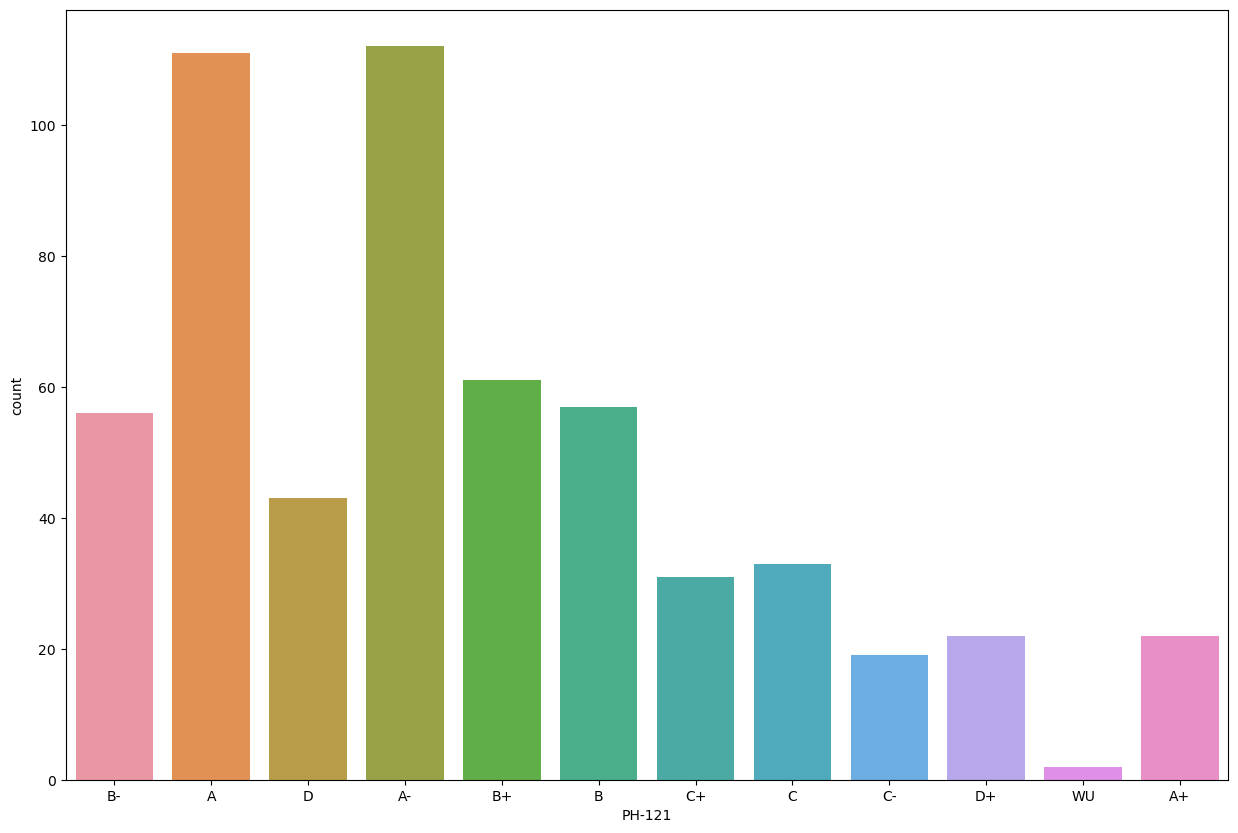

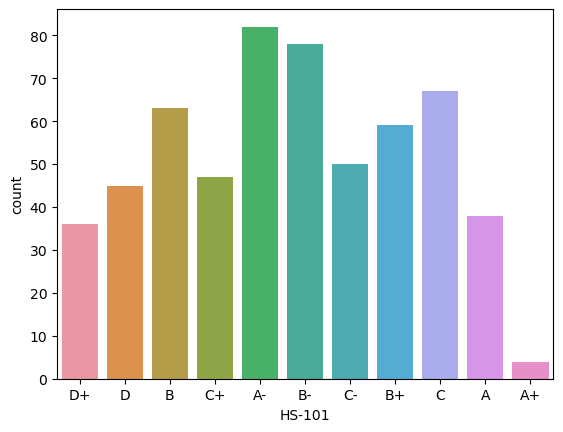

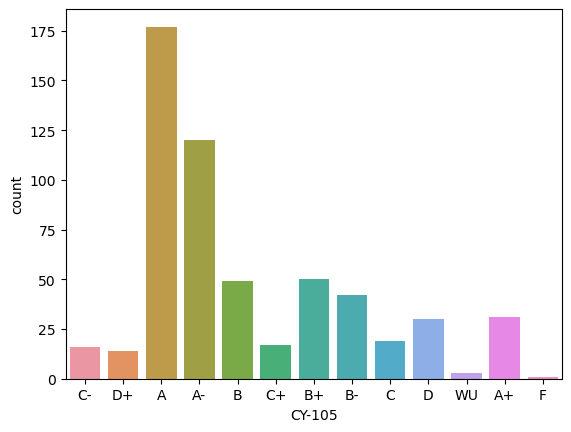

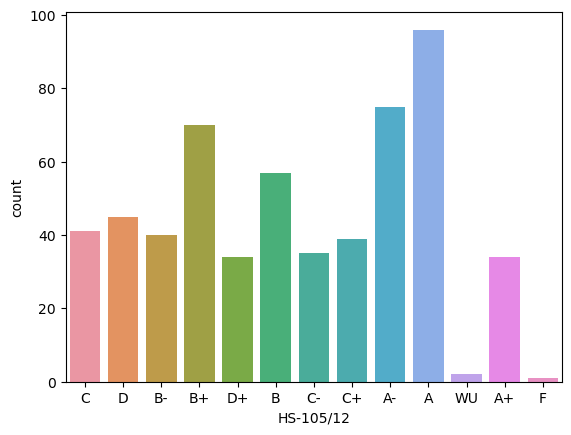

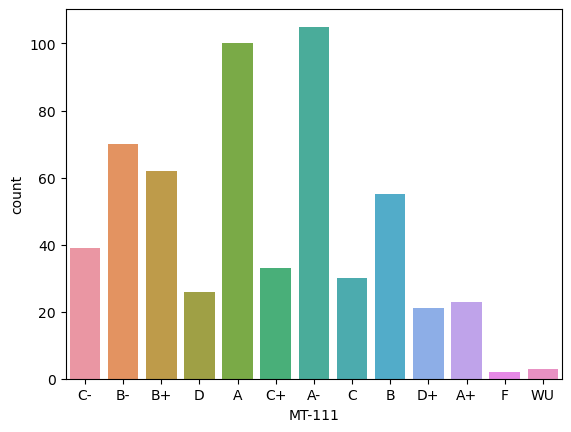

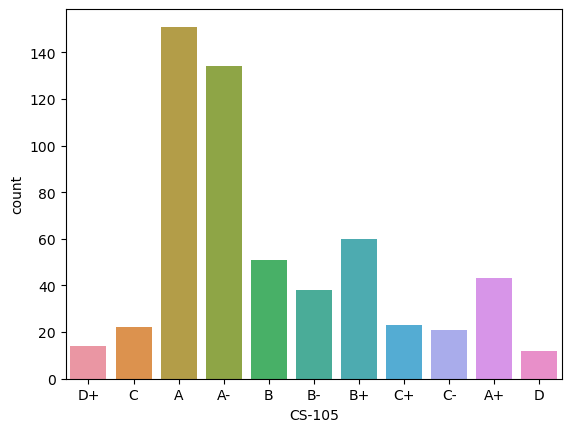

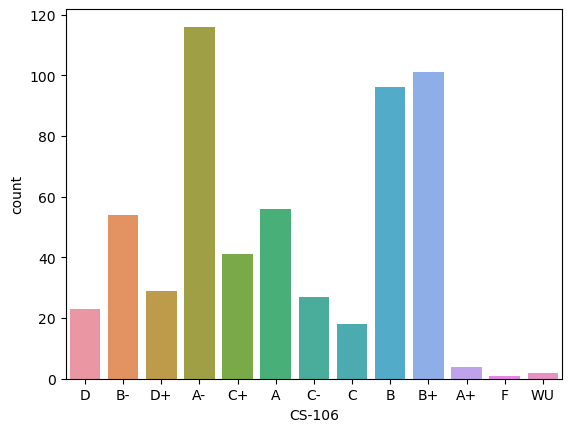

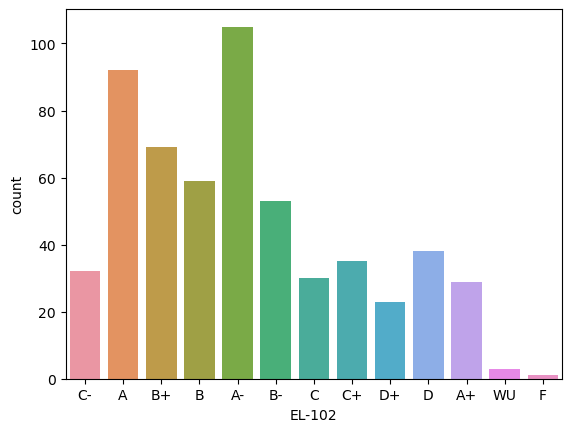

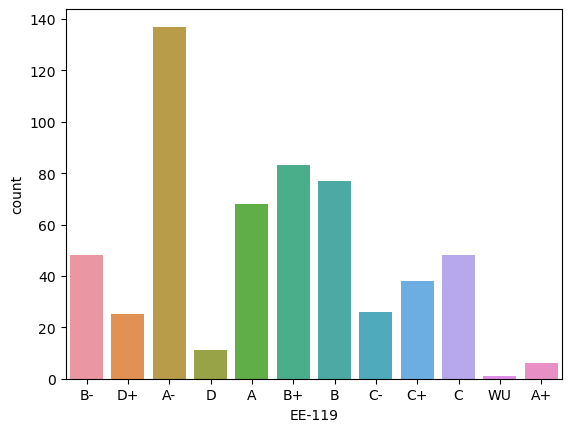

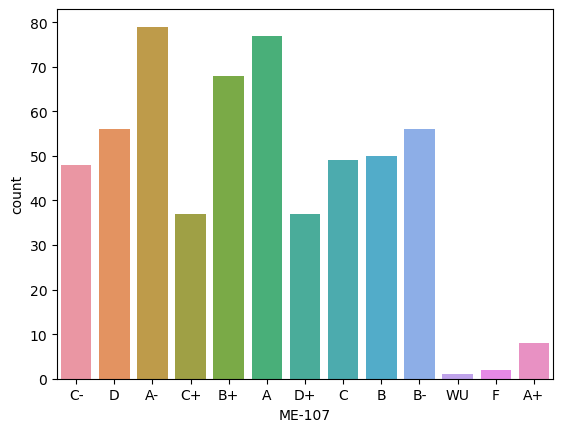

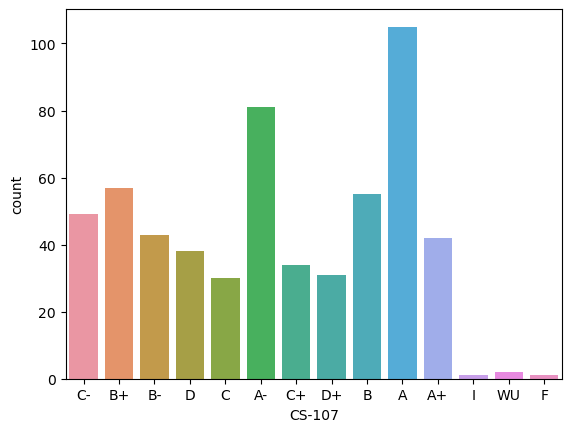

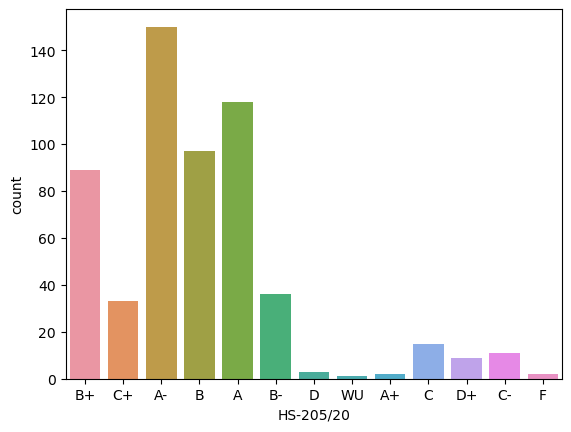

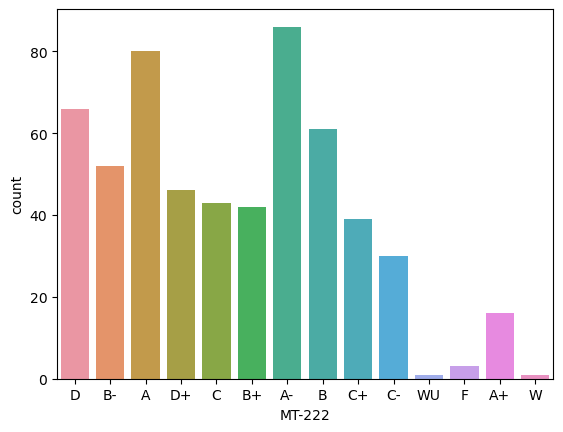

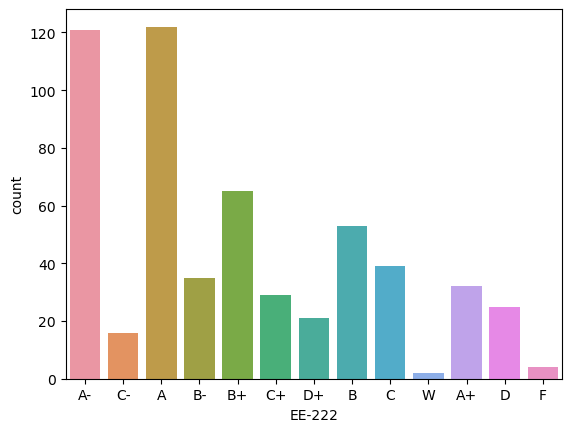

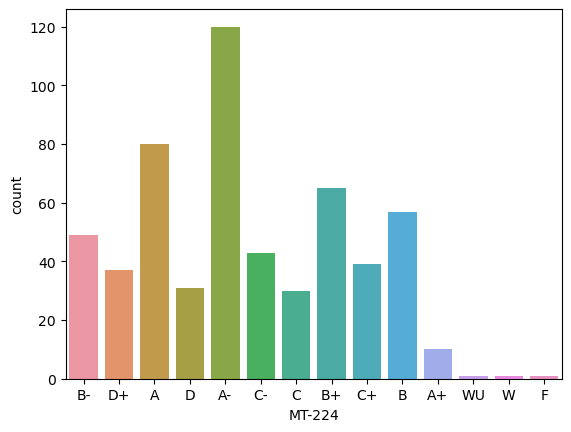

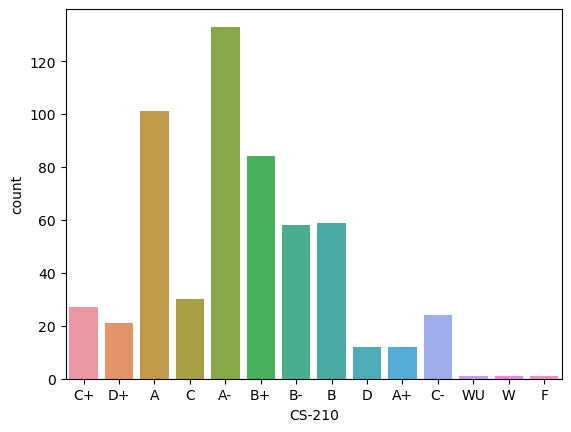

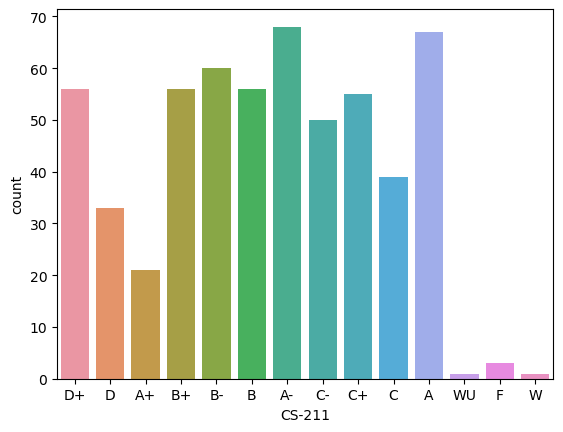

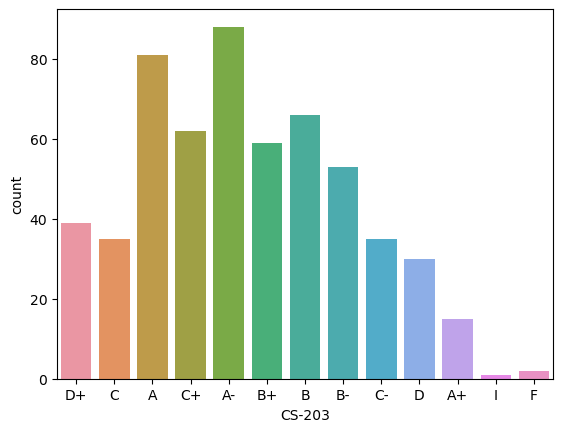

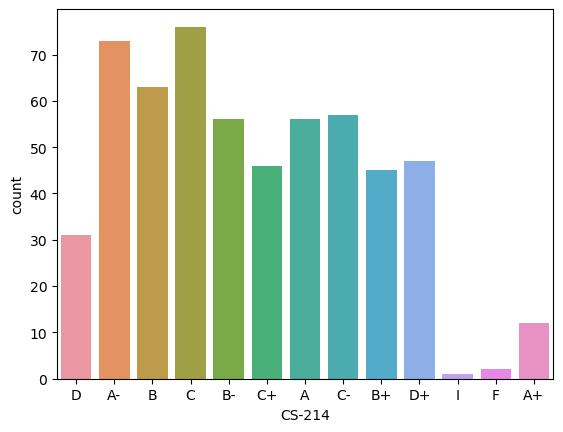

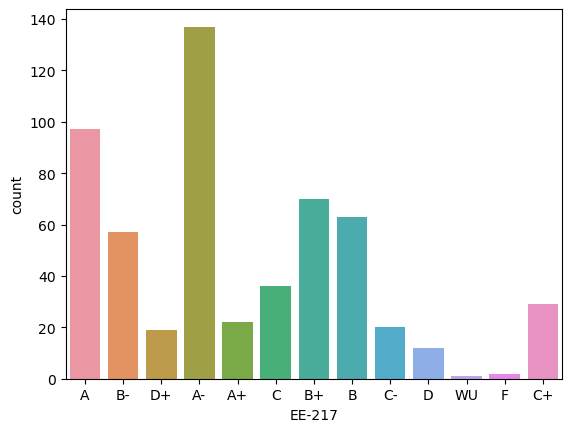

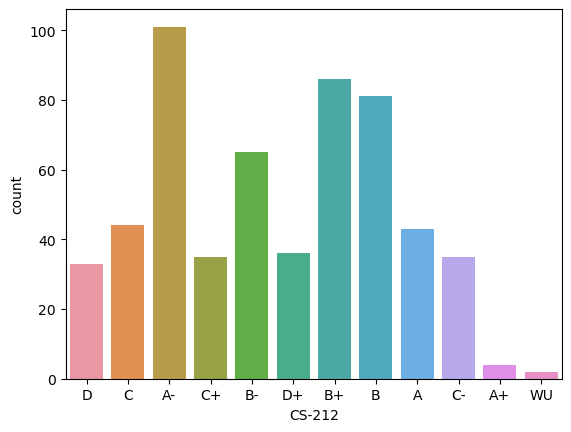

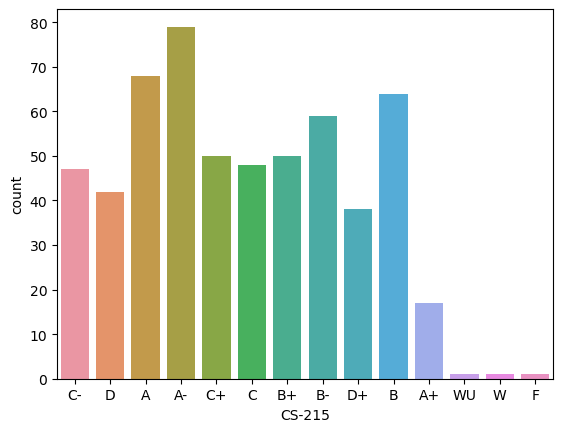

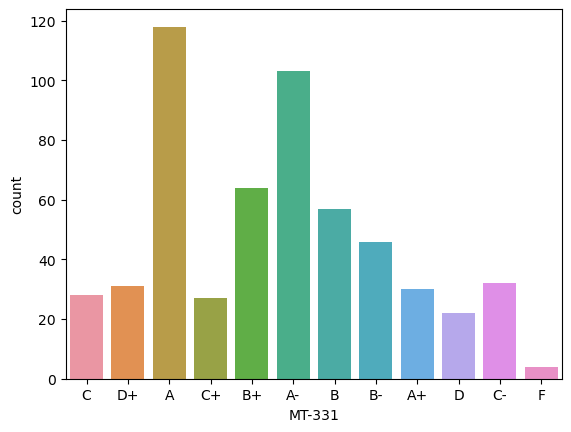

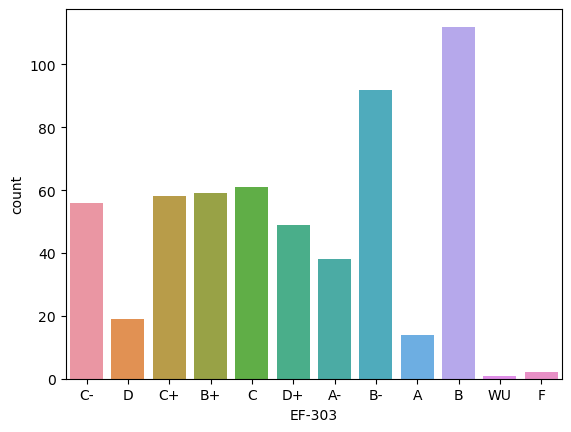

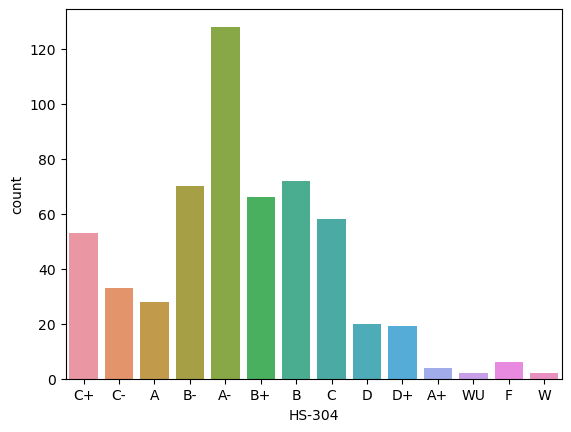

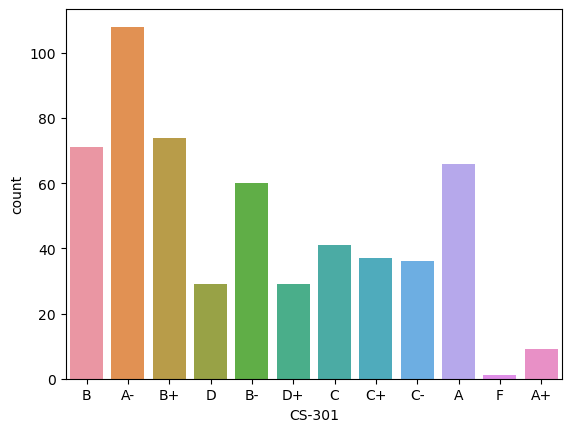

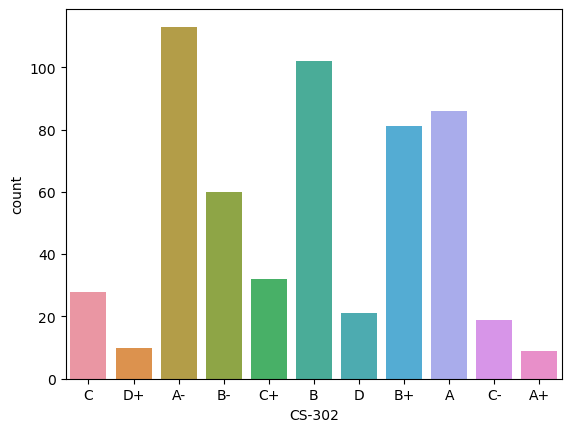

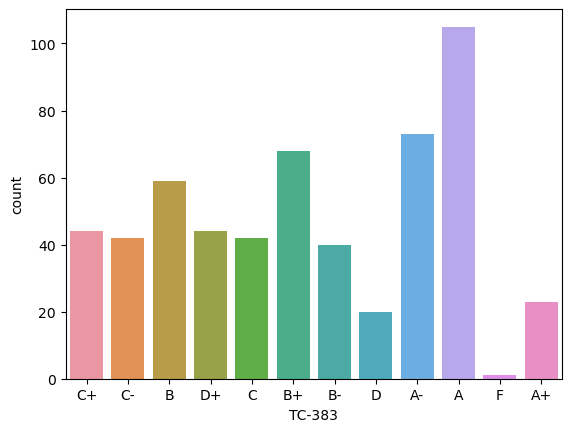

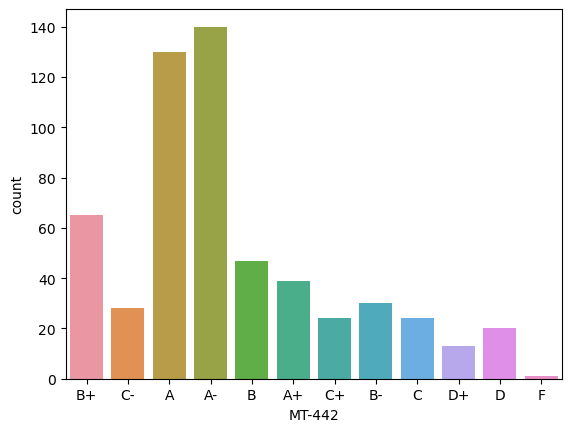

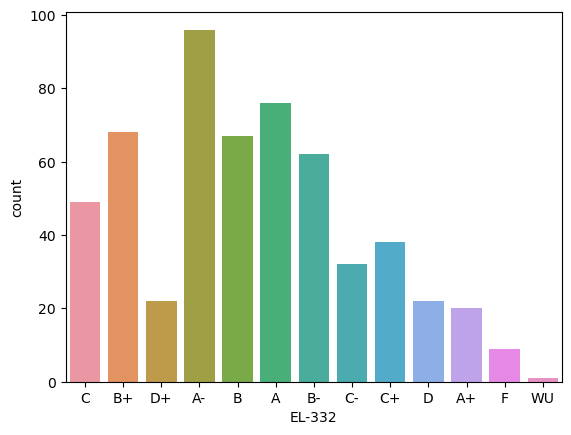

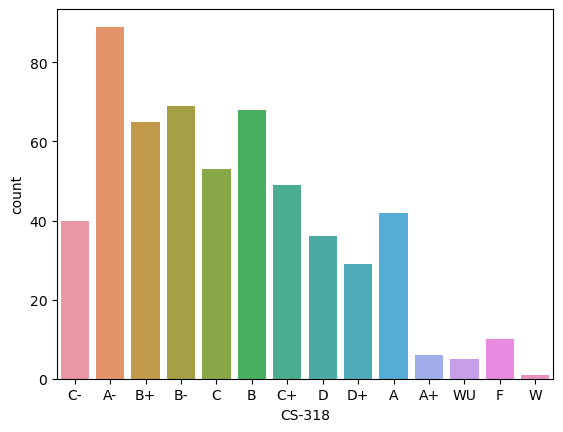

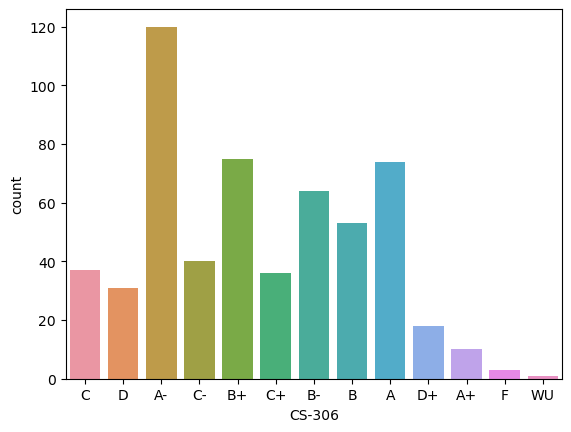

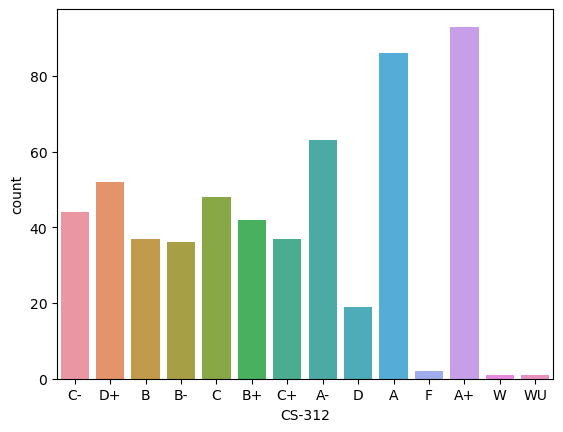

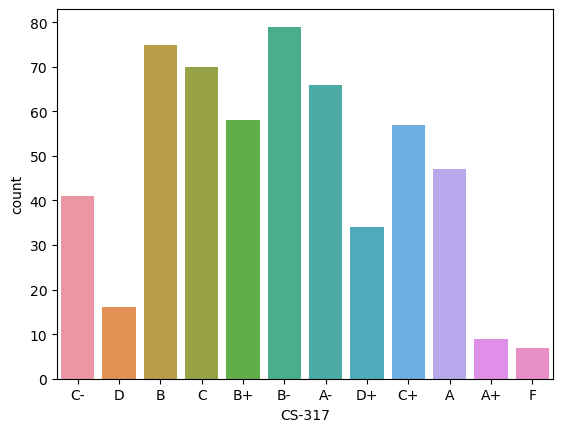

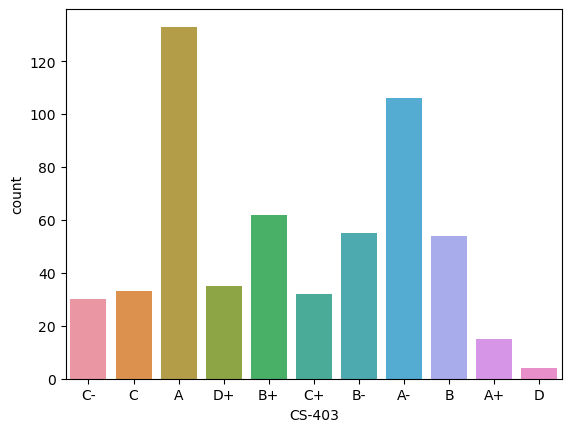

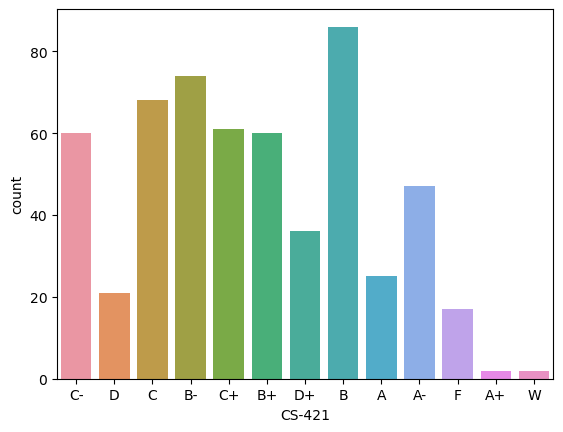

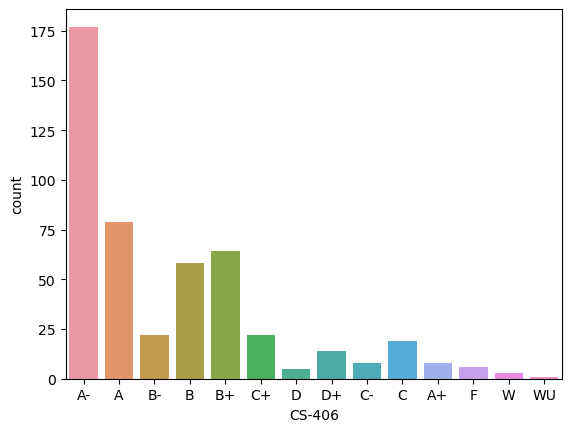

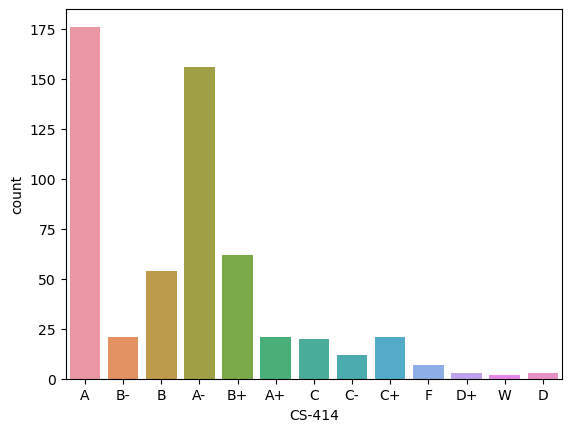

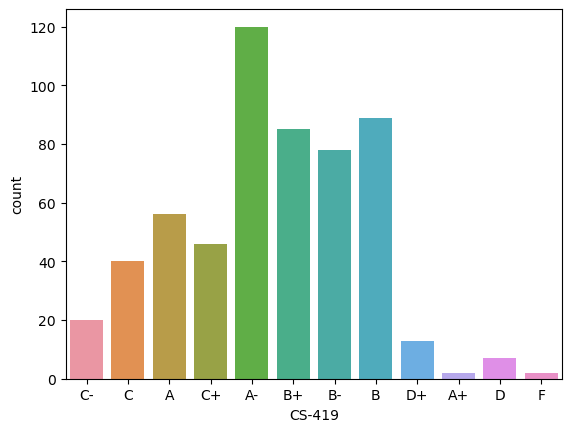

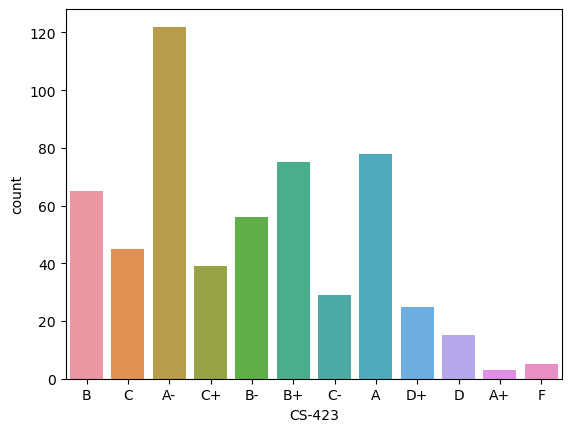

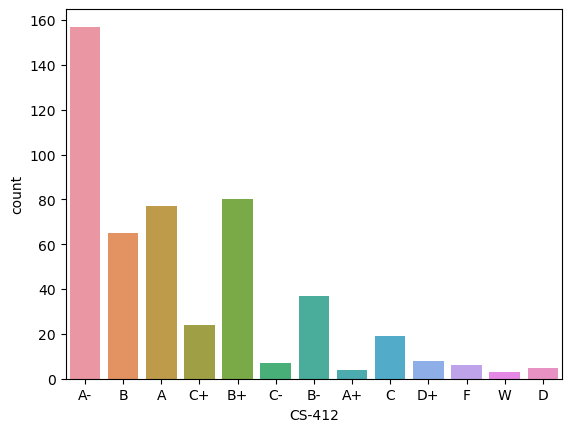

In [28]:
plt.figure(figsize=(15,10))
for col in X.columns:
    
    sns.countplot(x=X[col],data=X)
    plt.show()

# Observation

In [29]:
for i in X.columns:
    print(i)
    print('Number of unique data:',X[i].nunique())
    print('Value Counts')
    print(X[i].value_counts())
    print('')
    print('******************************************************************')
    print('')

PH-121
Number of unique data: 12
Value Counts
A-    112
A     111
B+     61
B      57
B-     56
D      43
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
Name: PH-121, dtype: int64

******************************************************************

HS-101
Number of unique data: 11
Value Counts
A-    82
B-    78
C     67
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
Name: HS-101, dtype: int64

******************************************************************

CY-105
Number of unique data: 13
Value Counts
A     177
A-    120
B+     50
B      49
B-     42
A+     31
D      30
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64

******************************************************************

HS-105/12
Number of unique data: 13
Value Counts
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    35
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64

****************************

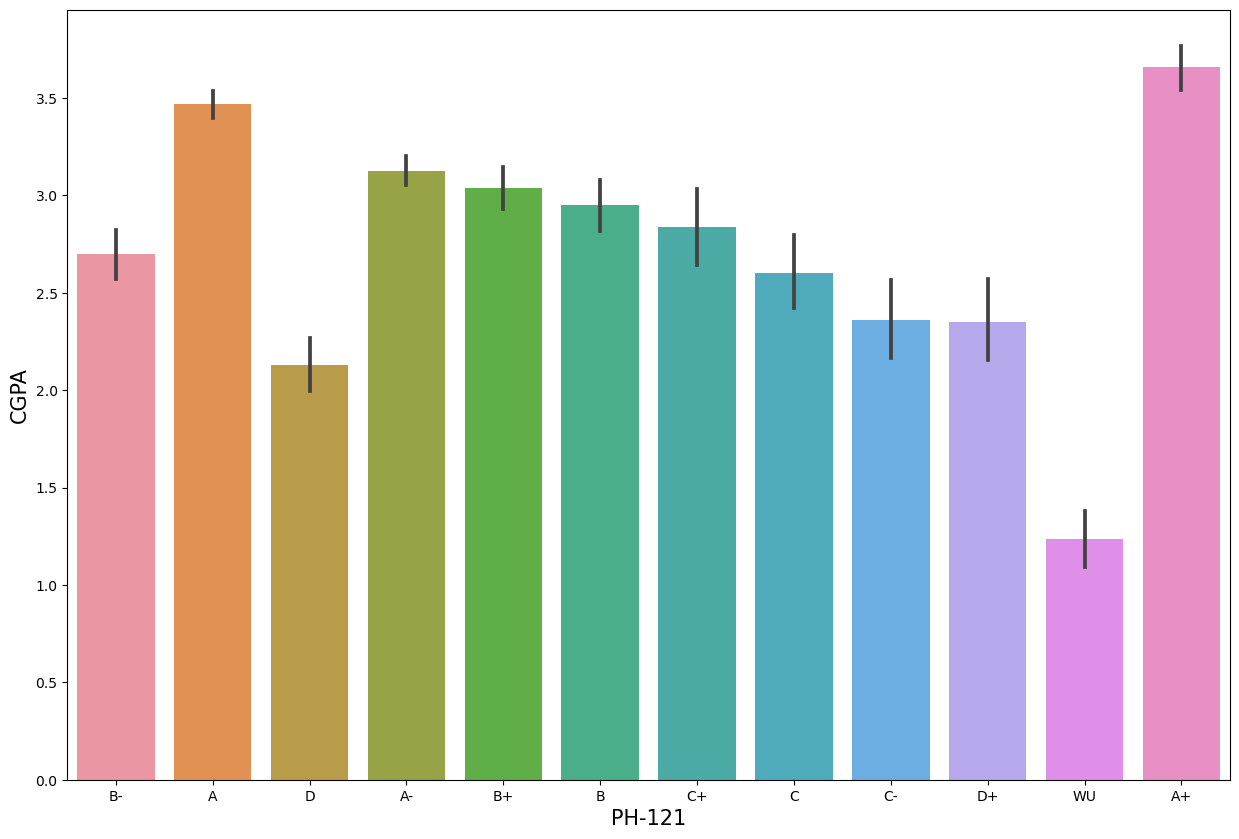

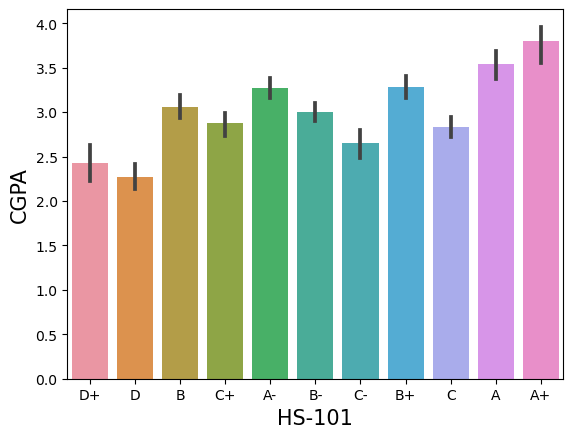

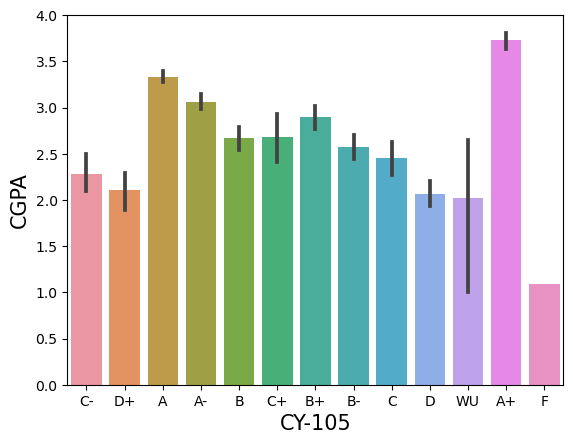

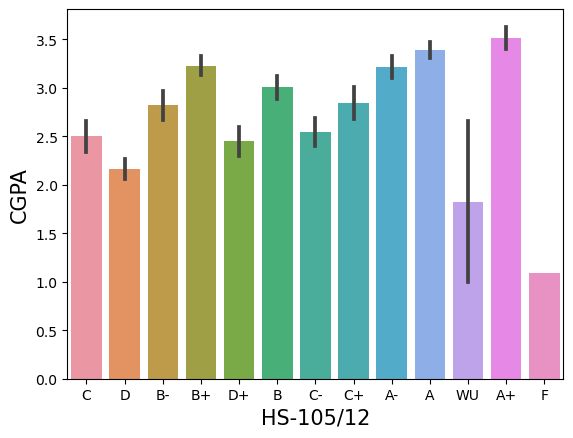

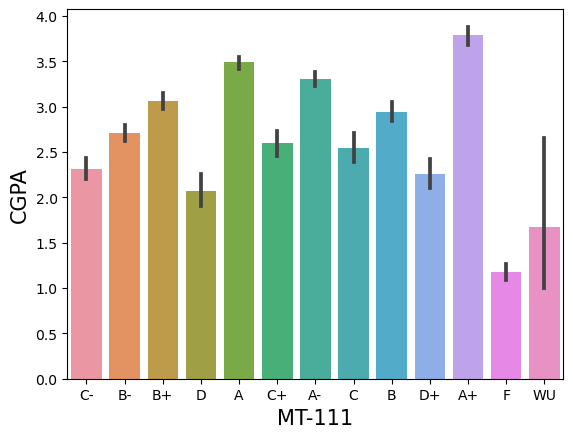

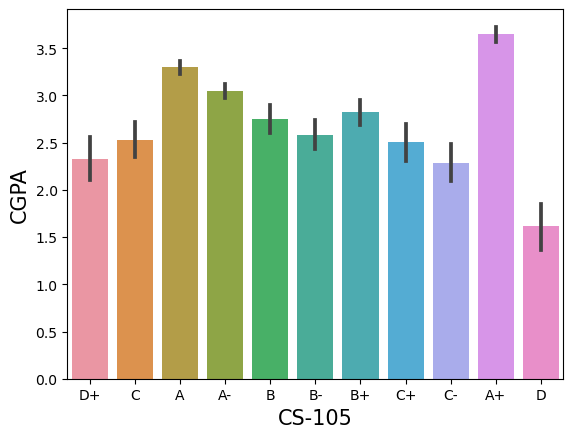

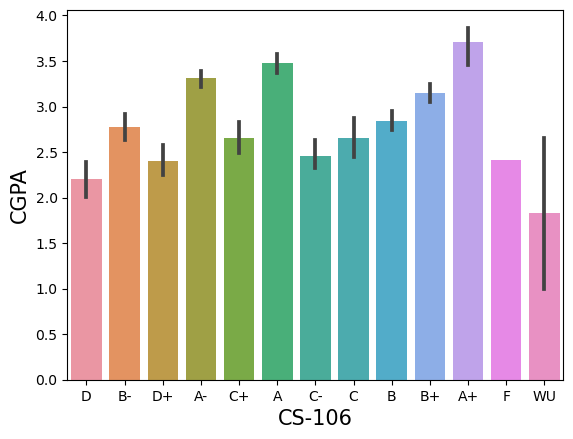

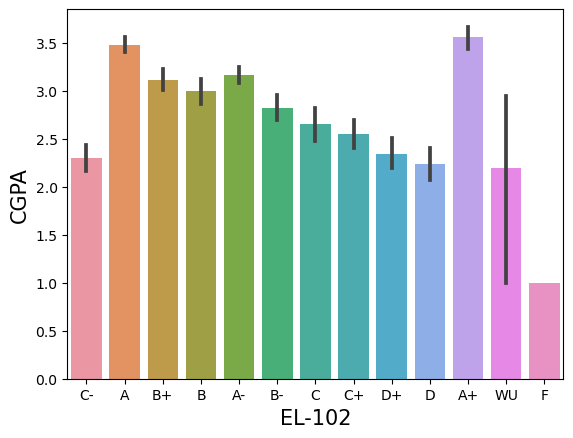

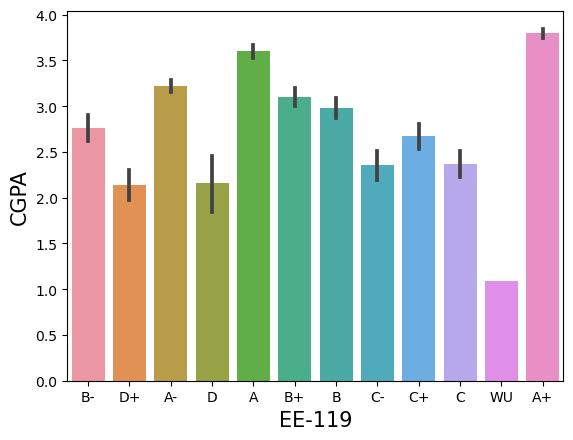

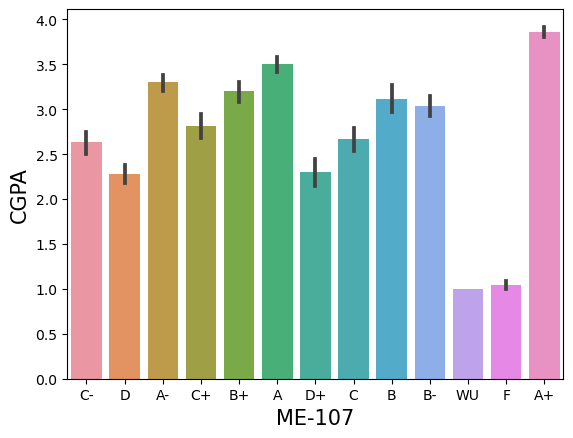

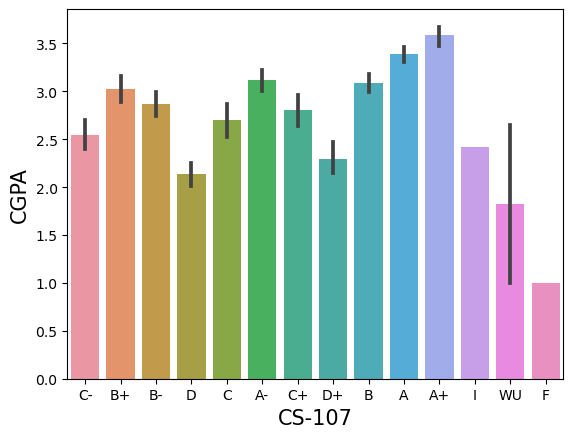

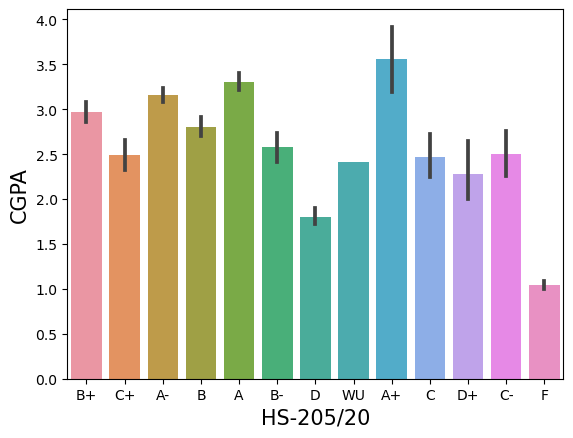

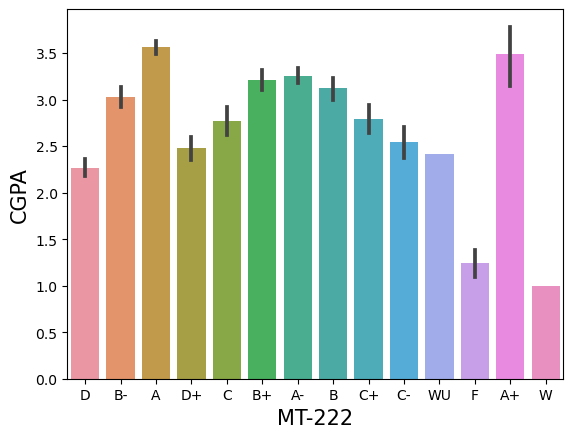

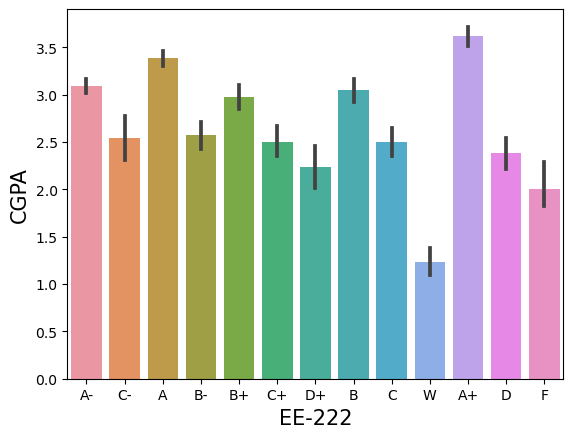

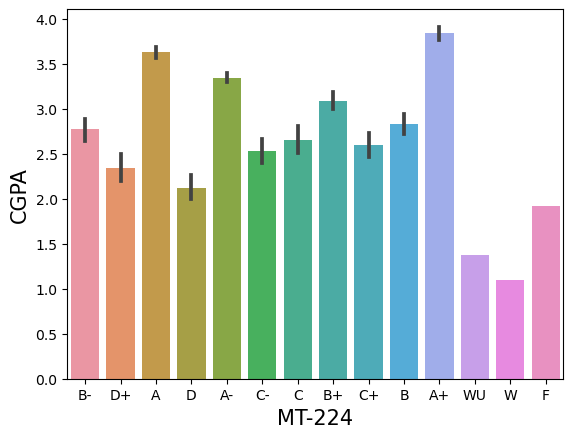

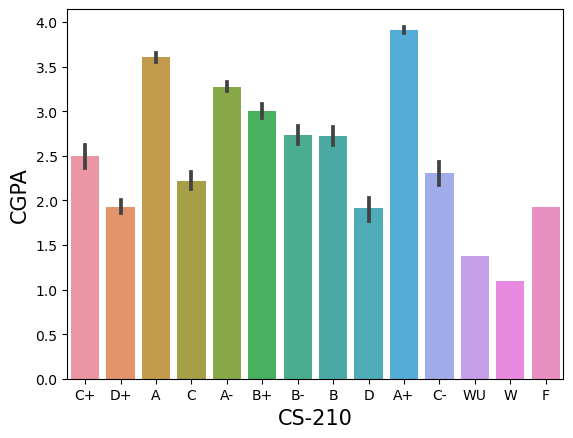

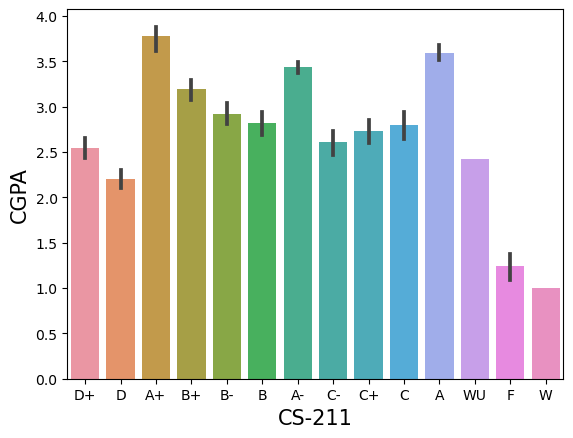

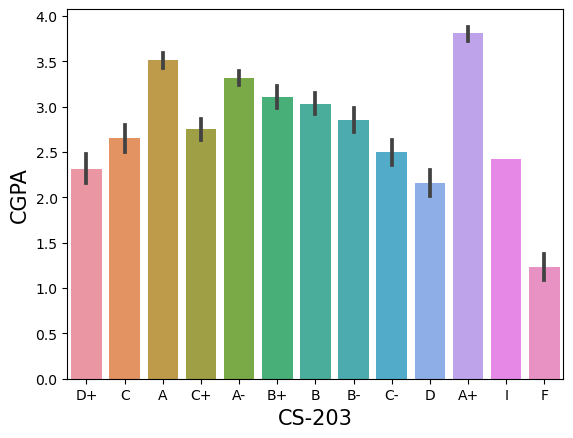

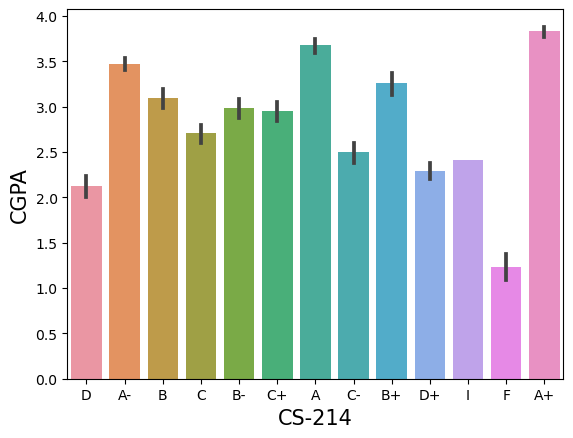

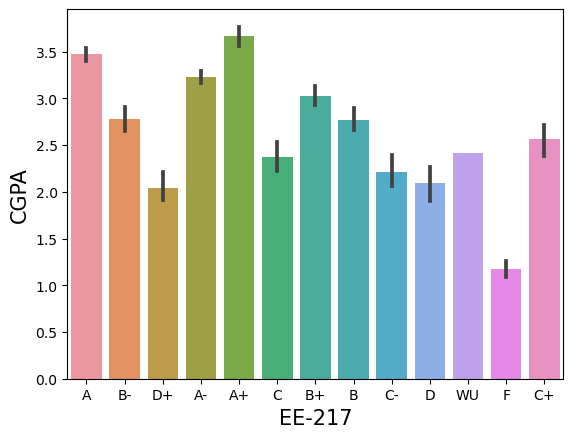

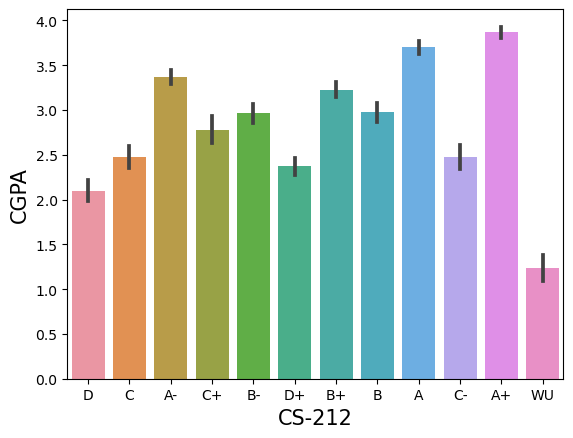

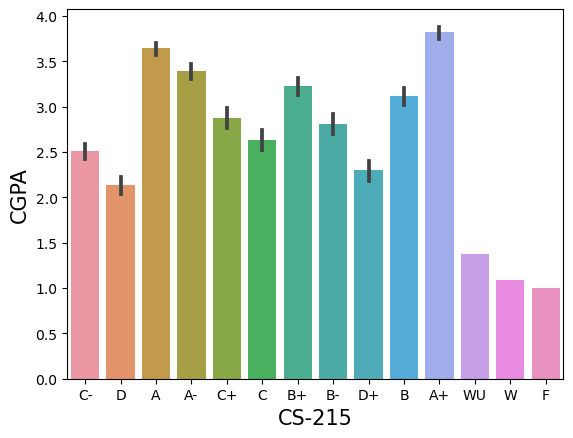

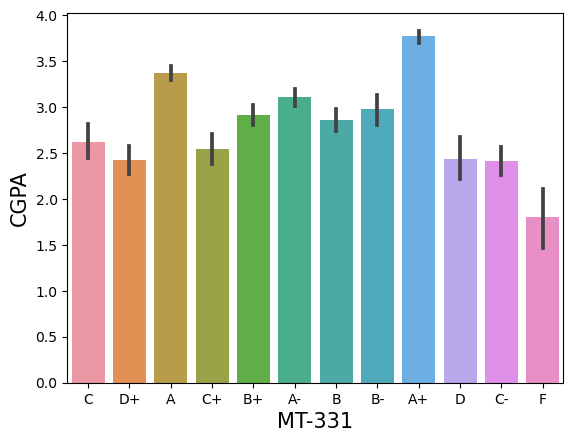

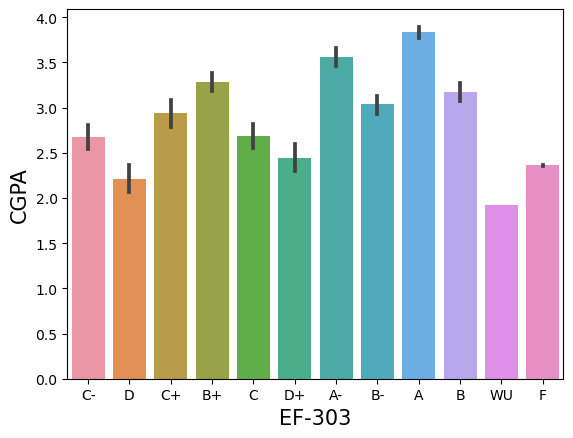

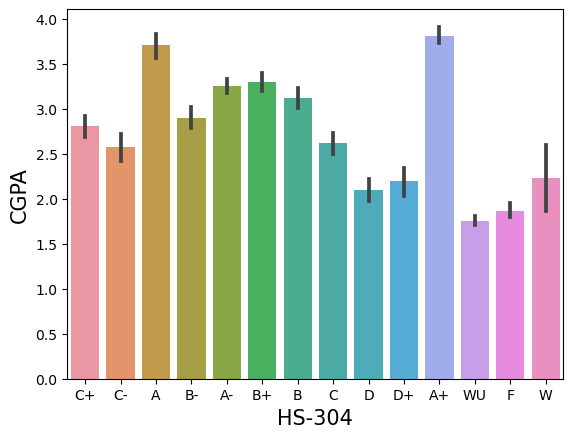

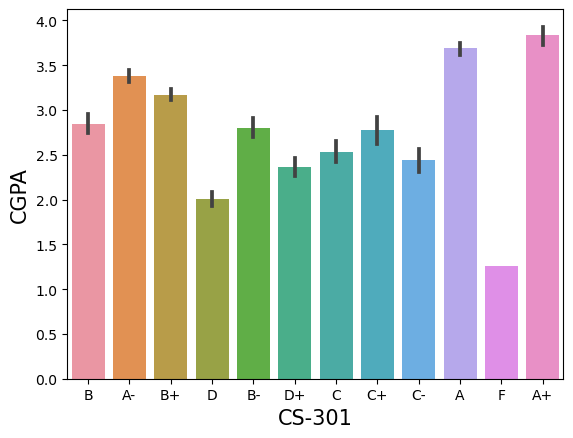

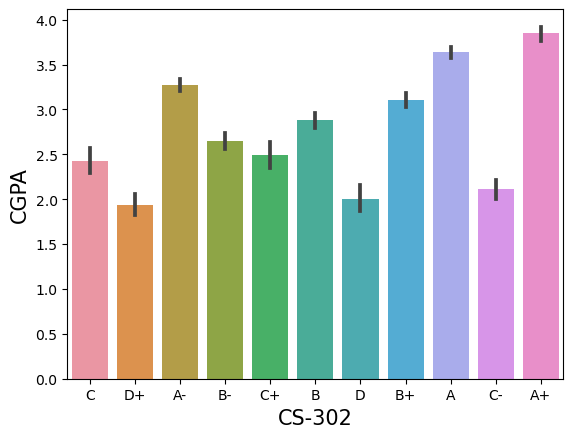

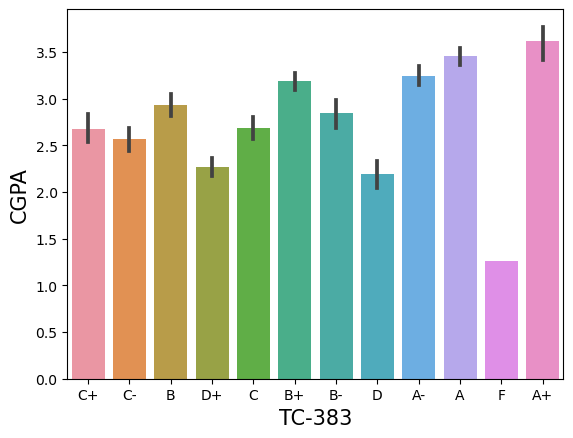

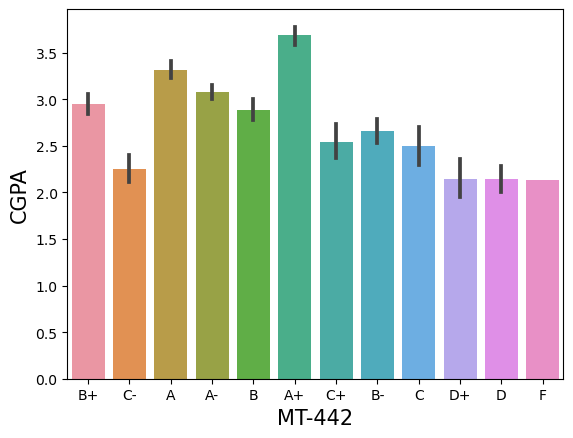

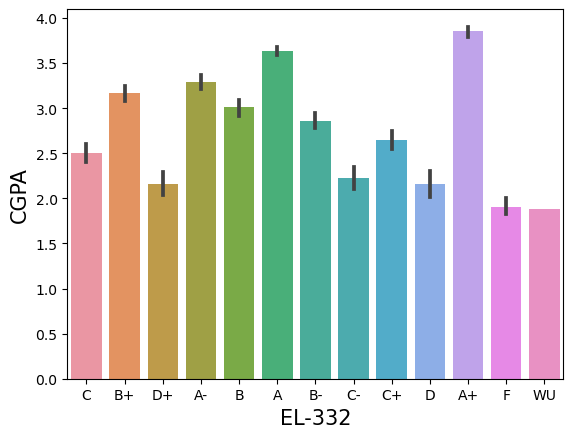

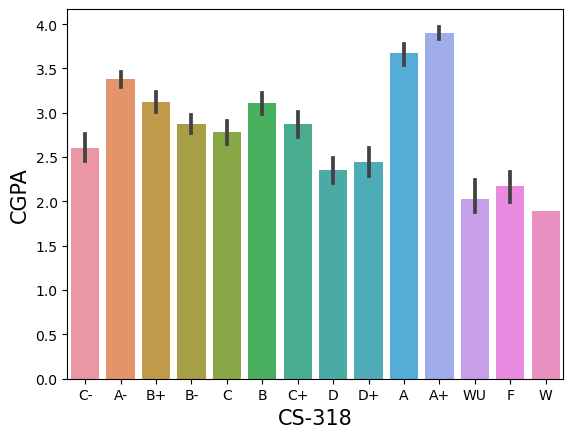

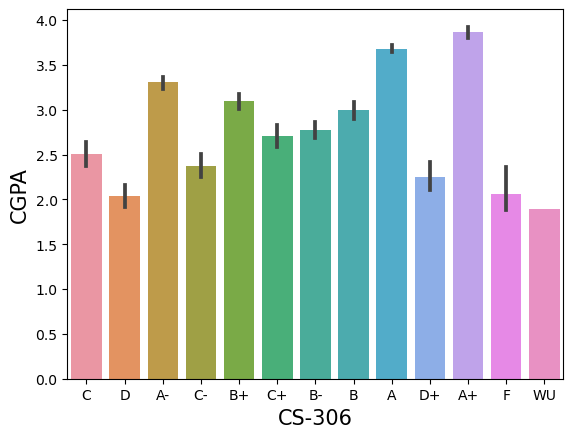

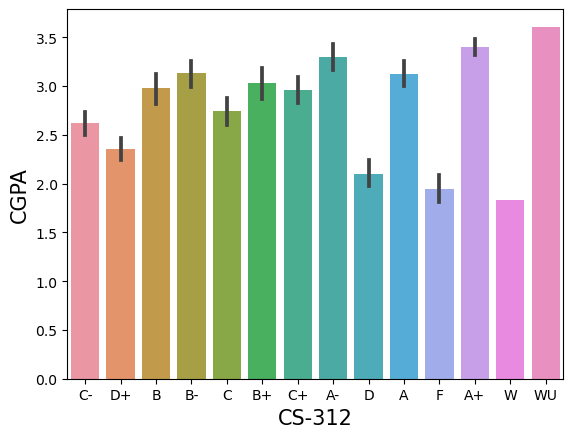

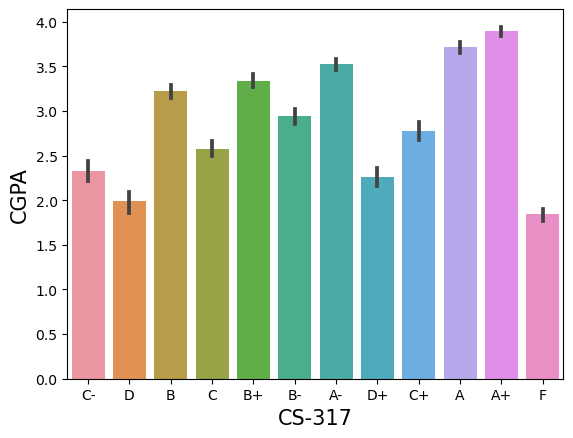

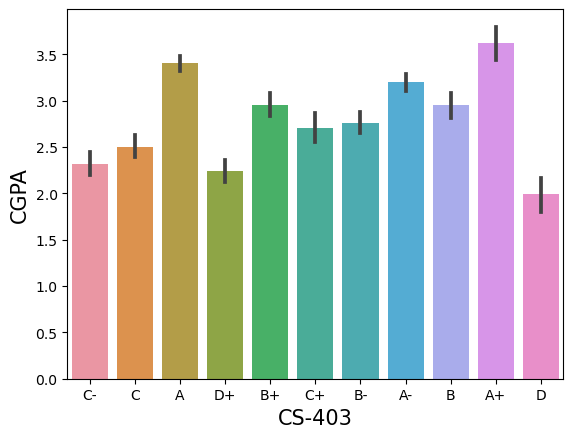

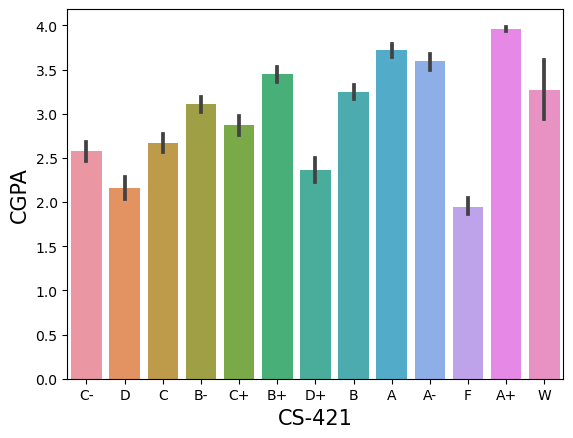

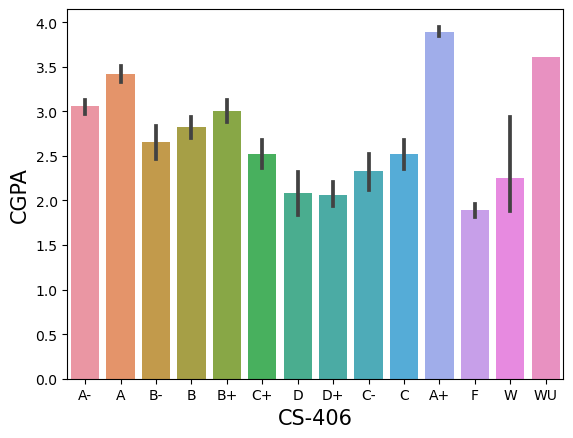

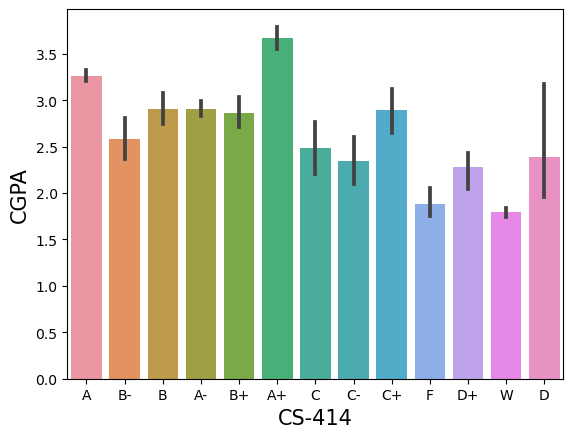

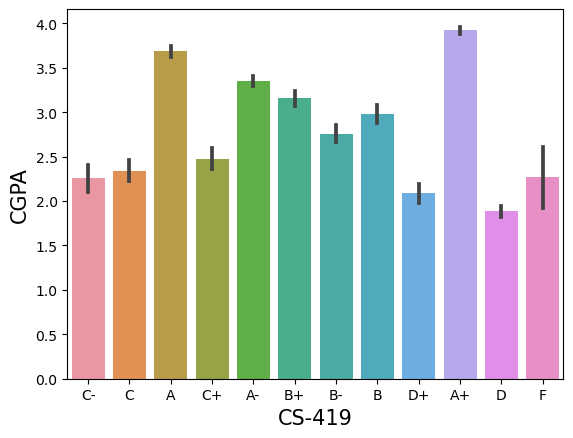

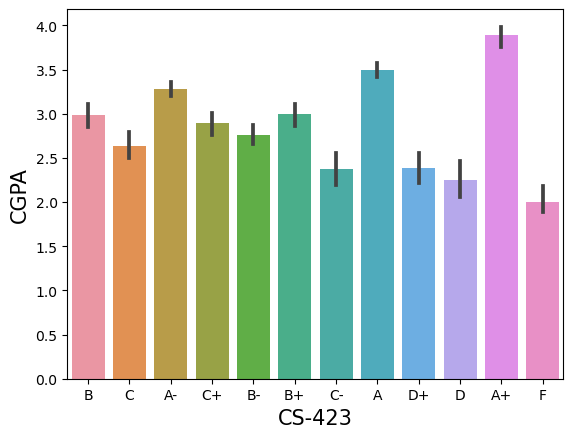

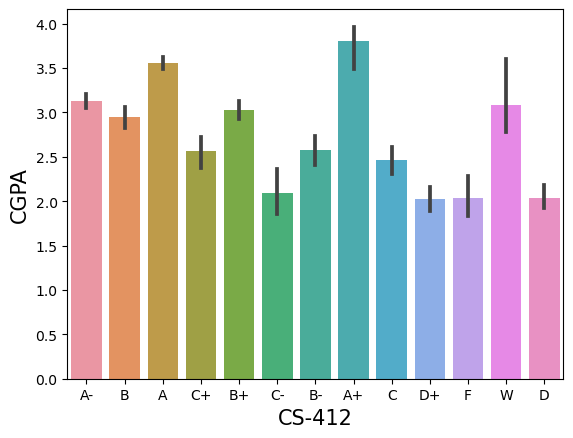

In [30]:
plt.figure(figsize=(15,10))
for col in X.columns:
    
    sns.barplot(x=X[col],y=stud['CGPA'], data=stud)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('CGPA', fontsize=15)
    plt.show()

# Label encoder

In [31]:
from sklearn.preprocessing import LabelEncoder
for col in X.columns:
    label = LabelEncoder()
    X[col] = label.fit_transform(X[col])

In [33]:
X.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5,10,8,6,8,10,9,8,5,8,...,6,8,8,8,8,2,0,8,3,2
1,0,9,10,9,5,6,9,0,10,9,...,9,10,9,6,9,2,5,6,6,3
2,0,3,0,5,4,0,5,4,2,2,...,2,3,3,0,6,0,0,0,2,0
3,9,7,10,9,9,2,10,8,9,7,...,8,10,6,10,8,5,3,7,7,7
4,2,2,2,4,0,0,2,4,0,2,...,2,5,4,4,5,2,0,2,2,0


# Modelling

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 112)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso

In [40]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y1 = reg.predict(x_test)
r1 = r2_score(y_test,y1)
print('R2 score is : ', r1)
print('Mean Absolute Error is :', mean_absolute_error(y_test,y1))
print('Mean Squared Error is :', mean_squared_error(y_test,y1))
print('Root Mean Squared Error is :',np.sqrt(mean_absolute_error(y_test,y1)))

R2 score is :  0.9520678316184835
Mean Absolute Error is : 0.081745342576948
Mean Squared Error is : 0.016410653045824397
Root Mean Squared Error is : 0.28591142435542516


In [44]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y2 = knn.predict(x_test)
r2 = r2_score(y_test,y2)

print('R2 score is :', r2)
print('Mean Absolute Error is :', mean_absolute_error(y_test,y2))
print('Mean Squared Error is :', mean_squared_error(y_test,y2))
print('Root Mean Squared Error is :',np.sqrt(mean_absolute_error(y_test,y2)))

R2 score is : 0.9463989700529443
Mean Absolute Error is : 0.09335384615384615
Mean Squared Error is : 0.01835151496503496
Root Mean Squared Error is : 0.30553861646909075


In [46]:
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
y3 = tree.predict(x_test)
r3 = r2_score(y_test,y3)

print('R2 score is :', r3)
print('Mean Absolute Error is :', mean_absolute_error(y_test,y3))
print('Mean Squared Error is :', mean_squared_error(y_test,y3))
print('Root Mean Squared Error is :',np.sqrt(mean_absolute_error(y_test,y3)))

R2 score is : 0.7652136177719281
Mean Absolute Error is : 0.20407692307692304
Mean Squared Error is : 0.08038438461538462
Root Mean Squared Error is : 0.45174873887695915


In [47]:
bag = BaggingRegressor()
bag.fit(x_train, y_train)
y4 = knn.predict(x_test)
r4 = r2_score(y_test,y2)

print('R2 score is :', r4)
print('Mean Absolute Error is :', mean_absolute_error(y_test,y4))
print('Mean Squared Error is :', mean_squared_error(y_test,y4))
print('Root Mean Squared Error is :',np.sqrt(mean_absolute_error(y_test,y4)))

R2 score is : 0.9463989700529443
Mean Absolute Error is : 0.09335384615384615
Mean Squared Error is : 0.01835151496503496
Root Mean Squared Error is : 0.30553861646909075


In [48]:
rand = RandomForestRegressor()
rand.fit(x_train, y_train)
y5 = knn.predict(x_test)
r5 = r2_score(y_test,y5)

print('R2 score is :', r5)
print('Mean Absolute Error is :', mean_absolute_error(y_test,y5))
print('Mean Squared Error is :', mean_squared_error(y_test,y5))
print('Root Mean Squared Error is :',np.sqrt(mean_absolute_error(y_test,y5)))

R2 score is : 0.9463989700529443
Mean Absolute Error is : 0.09335384615384615
Mean Squared Error is : 0.01835151496503496
Root Mean Squared Error is : 0.30553861646909075


In [49]:
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
y6 = ada.predict(x_test)
r6 = r2_score(y_test,y2)

print('R2 score is :', r6)
print('Mean Absolute Error is :', mean_absolute_error(y_test,y6))
print('Mean Squared Error is :', mean_squared_error(y_test,y6))
print('Root Mean Squared Error is :',np.sqrt(mean_absolute_error(y_test,y6)))

R2 score is : 0.9463989700529443
Mean Absolute Error is : 0.13435992724309279
Mean Squared Error is : 0.02628980586220862
Root Mean Squared Error is : 0.3665513978190409


In [56]:
grad = GradientBoostingRegressor()
grad.fit(x_train, y_train)
y7 = grad.predict(x_test)
r7 = r2_score(y_test,y7)

print('R2 score is :', r7)
print('Mean Absolute Error is :', mean_absolute_error(y_test,y7))
print('Mean Squared Error is :', mean_squared_error(y_test,y7))
print('Root Mean Squared Error is :',np.sqrt(mean_absolute_error(y_test,y7)))

R2 score is : 0.9684376422936043
Mean Absolute Error is : 0.07784830473320381
Mean Squared Error is : 0.010806081158381225
Root Mean Squared Error is : 0.2790130906126159


In [57]:
svr = SVR()
svr.fit(x_train, y_train)
y8 = svr.predict(x_test)
r8 = r2_score(y_test,y8)

print('R2 score is :', r8)
print('Mean Absolute Error is :', mean_absolute_error(y_test,y8))
print('Mean Squared Error is :', mean_squared_error(y_test,y8))
print('Root Mean Squared Error is :',np.sqrt(mean_absolute_error(y_test,y8)))

R2 score is : 0.9796269497883826
Mean Absolute Error is : 0.06671894172960566
Mean Squared Error is : 0.006975170742263727
Root Mean Squared Error is : 0.2583001001347186


In [58]:
xgb = xgb.XGBRegressor()
xgb.fit(x_train, y_train)
y9 = xgb.predict(x_test)
r9 = r2_score(y_test,y9)

print('R2 score is :', r9)
print('Mean Absolute Error is :', mean_absolute_error(y_test,y9))
print('Mean Squared Error is :', mean_squared_error(y_test,y9))
print('Root Mean Squared Error is :',np.sqrt(mean_absolute_error(y_test,y9)))

NameError: name 'xgb' is not defined

In [59]:
lasso = Lasso()
lasso.fit(x_train, y_train)
y10 = lasso.predict(x_test)
r10 = r2_score(y_test,y10)

print('R2 score is :', r10)
print('Mean Absolute Error is :', mean_absolute_error(y_test,y10))
print('Mean Squared Error is :', mean_squared_error(y_test,y10))
print('Root Mean Squared Error is :',np.sqrt(mean_absolute_error(y_test,y10)))

R2 score is : 0.4474955587876098
Mean Absolute Error is : 0.35594045339243396
Mean Squared Error is : 0.1891622890674397
Root Mean Squared Error is : 0.5966074533497163


In [60]:
ridge = Ridge()
ridge.fit(x_train, y_train)
y11 = ridge.predict(x_test)
r11 = r2_score(y_test,y11)

print('R2 score is :', r11)
print('Mean Absolute Error is :', mean_absolute_error(y_test,y11))
print('Mean Squared Error is :', mean_squared_error(y_test,y11))
print('Root Mean Squared Error is :',np.sqrt(mean_absolute_error(y_test,y11)))

R2 score is : 0.9520773449333326
Mean Absolute Error is : 0.0817157913472687
Mean Squared Error is : 0.01640739594908592
Root Mean Squared Error is : 0.2858597406898507


In [64]:
performance=pd.DataFrame({"Models": ['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor','BaggingRegressor','RandomForestRegressor',
                                           'AdaBoostRegressor','GradientBoostingRegressor','SVR','Lasso','Ridge'],
                          "r2 value":[r1,r2,r3,r4,r5,r6,r7,r8,r10,r11]})
performance

,Models,r2 value
0,LinearRegression,0.952068
1,KNeighborsRegressor,0.946399
2,DecisionTreeRegressor,0.765214
3,BaggingRegressor,0.946399
4,RandomForestRegressor,0.946399
5,AdaBoostRegressor,0.946399
6,GradientBoostingRegressor,0.968438
7,SVR,0.979627
8,Lasso,0.447496
9,Ridge,0.952077


In [71]:
import plotly.express as px
fig = px.bar(performance, x=performance['Models'], y=performance['r2 value'])
fig.update_layout(template='plotly_dark')
fig

# obervation

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
score1 = cross_val_score(reg,X,y)
print(score1)
print('Different of r2_score and cross vald score is :', (r2_score(y_test,y1)-score1.mean())*100)

[0.94799766 0.83613804 0.95137379 0.94623343 0.92420187]
Different of r2_score and cross vald score is : 3.0878872791144873


In [76]:
score2 = cross_val_score(knn,X,y)
print(score2)
print('Different of r2_score and cross vald score is :', (r2_score(y_test,y2)-score2.mean())*100)

[0.96494122 0.86218468 0.92232751 0.95319879 0.94465479]
Different of r2_score and cross vald score is : 1.6937571927263861


In [77]:
score3 = cross_val_score(tree,X,y)
print(score3)
print('Different of r2_score and cross vald score is :', (r2_score(y_test,y3)-score3.mean())*100)

[0.83431312 0.78377703 0.82913281 0.74213609 0.7530154 ]
Different of r2_score and cross vald score is : -2.326127321826932


In [78]:
score4 = cross_val_score(bag,X,y)
print(score4)
print('Different of r2_score and cross vald score is :', (r2_score(y_test,y4)-score4.mean())*100)

[0.94576438 0.85547237 0.9352081  0.90900866 0.91507675]
Different of r2_score and cross vald score is : 3.4292917437374615


In [79]:
score5 = cross_val_score(rand,X,y)
print(score5)
print('Different of r2_score and cross vald score is :', (r2_score(y_test,y5)-score5.mean())*100)

[0.95278683 0.89421293 0.95135461 0.94329441 0.93121469]
Different of r2_score and cross vald score is : 1.1826275992000923


In [80]:
score6 = cross_val_score(ada,X,y)
print(score6)
print('Different of r2_score and cross vald score is :', (r2_score(y_test,y6)-score6.mean())*100)

[0.9238091  0.89448531 0.93146619 0.92044034 0.87831497]
Different of r2_score and cross vald score is : 1.350965917115221


In [81]:
score7 = cross_val_score(grad,X,y)
print(score7)
print('Different of r2_score and cross vald score is :', (r2_score(y_test,y7)-score7.mean())*100)

[0.96764994 0.93735059 0.9627495  0.9599423  0.95392898]
Different of r2_score and cross vald score is : 1.2113380820117148


In [82]:
score8 = cross_val_score(svr,X,y)
print(score8)
print('Different of r2_score and cross vald score is :', (r2_score(y_test,y8)-score8.mean())*100)

[0.97363178 0.95216755 0.95191207 0.96328879 0.9592072 ]
Different of r2_score and cross vald score is : 1.9585469256066745


In [86]:
score9 = cross_val_score(xgb,X,y)
print(score9)
print('Different of r2_score and cross vald score is :', (r2_score(y_test,y9)-score9.mean())*100)

In [88]:
score10 = cross_val_score(lasso,X,y)
print(score10)
print('Different of r2_score and cross vald score is :', (r2_score(y_test,y10)-score10.mean())*100)

[0.43905257 0.40147913 0.39647087 0.41318342 0.38004677]
Different of r2_score and cross vald score is : 4.144900440006266


In [89]:
score11 = cross_val_score(ridge,X,y)
print(score11)
print('Different of r2_score and cross vald score is :', (r2_score(y_test,y11)-score11.mean())*100)

[0.9480024  0.83611762 0.95139985 0.94626586 0.92423558]
Different of r2_score and cross vald score is : 3.0873081819186465


In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
param={
       'C':[1,5,10,15,20],
      'epsilon':[0.2,0.5,0.6,1.0,1.2,1.5],
       'gamma':[0.001,0.1,0.2,0.002,0.02]
      }
gridsearch=GridSearchCV(estimator=svr,param_grid=param,cv=5)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'C': 10, 'epsilon': 0.2, 'gamma': 0.001}